In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "content/input/instagram-user-growth-by-country/instagram-users-by-country-2024.csv"
df = pd.read_csv(file_path)
df.head()

,country,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023
0,India,392465000.0,33.1,66.9,229600000
1,United States,172606200.0,55.4,44.6,143400000
2,Indonesia,90183200.0,54.2,45.8,89150000
3,Pakistan,18593301.0,35.1,64.9,12950000
4,Nigeria,12635900.0,46.5,53.5,7100000


In [3]:
df.shape

(226, 5)

In [4]:
df.tail()

,country,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023
221,Saint Pierre and Miquelon,NaN,NaN,NaN,1650
222,Montserrat,NaN,NaN,NaN,1300
223,Falkland Islands,NaN,NaN,NaN,1100
224,Tokelau,NaN,NaN,NaN,100
225,Niue,NaN,NaN,NaN,450


In [5]:
df.describe()

,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023
count,2.050000e+02,205.000000,205.000000,2.260000e+02
mean,8.352472e+06,50.350244,49.650244,5.320702e+06
std,3.274025e+07,9.245188,9.244875,1.985175e+07
min,2.600000e+03,19.200000,33.900000,1.000000e+02
25%,1.277000e+05,46.100000,43.800000,5.380000e+04
50%,1.030700e+06,54.100000,45.900000,4.855500e+05
75%,3.949200e+06,56.200000,53.900000,2.750000e+06
max,3.924650e+08,66.100000,80.800000,2.296000e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        226 non-null    object 
 1   InstagramUsers_2024            205 non-null    float64
 2   InstagramUsers_PctFemale_2024  205 non-null    float64
 3   InstagramUsers_PctMale_2024    205 non-null    float64
 4   InstagramUsers2023             226 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 9.0+ KB


<Axes: >

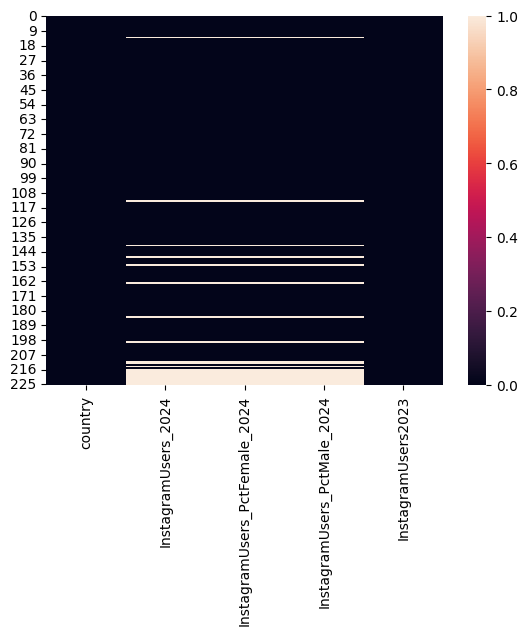

In [7]:
sns.heatmap(df.isna())

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
InstagramUsers_2024,205.0,8.352472e+06,3.274025e+07,2600.0,127700.0,1030700.0,3949200.0,392465000.0
InstagramUsers_PctFemale_2024,205.0,5.035024e+01,9.245188e+00,19.2,46.1,54.1,56.2,66.1
InstagramUsers_PctMale_2024,205.0,4.965024e+01,9.244875e+00,33.9,43.8,45.9,53.9,80.8
InstagramUsers2023,226.0,5.320702e+06,1.985175e+07,100.0,53800.0,485550.0,2750000.0,229600000.0


<Axes: >

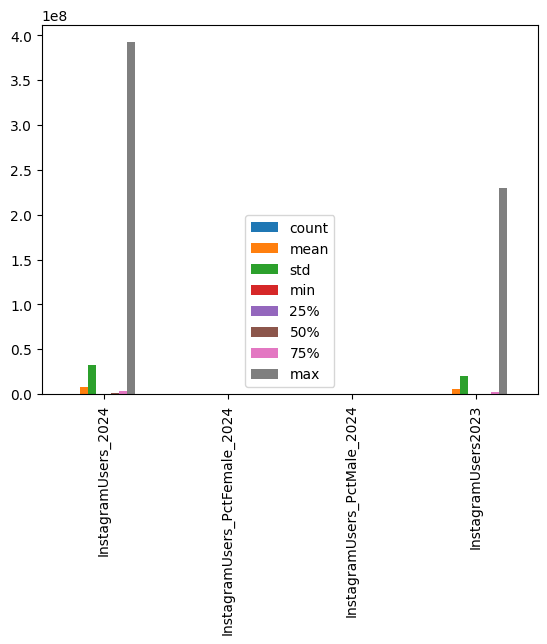

In [9]:
df.describe().T.plot(kind='bar')

In [10]:
df.isna().sum()

country                           0
InstagramUsers_2024              21
InstagramUsers_PctFemale_2024    21
InstagramUsers_PctMale_2024      21
InstagramUsers2023                0
dtype: int64

In [11]:
df.duplicated().sum()

0

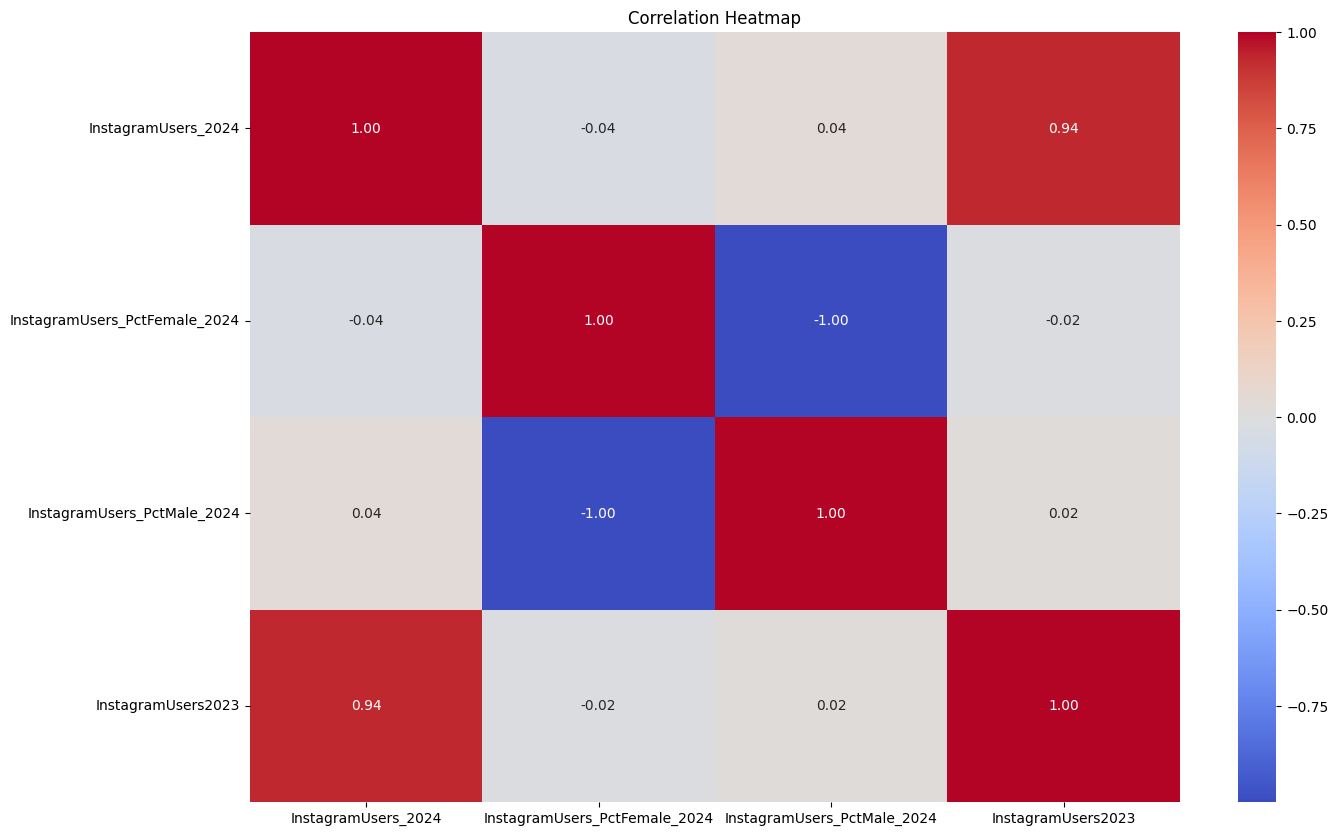

In [12]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

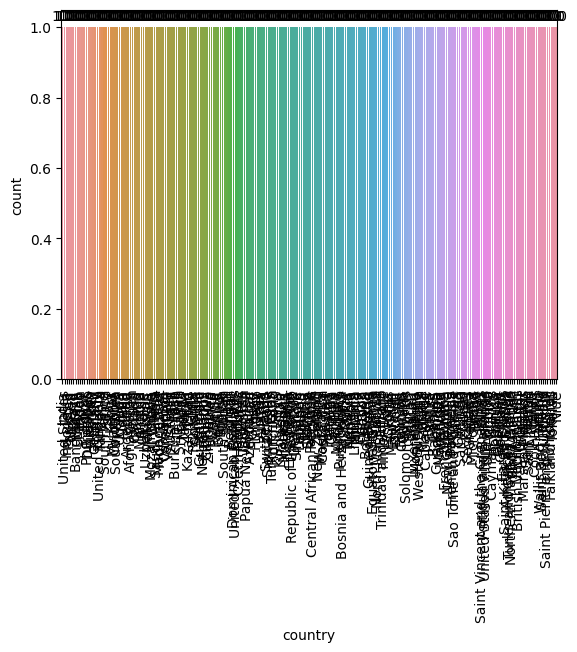

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df:
    if df[col].dtype == 'O':  
        ax = sns.countplot(x=col, data=df)

        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                        textcoords='offset points')
        
        plt.xticks(rotation=90)  
        plt.show()  

In [14]:
def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, rotation=rotation, label_type=location)
    axes.set_yticklabels(())
    axes.set_ylabel("")
    axes.set_xlabel("")

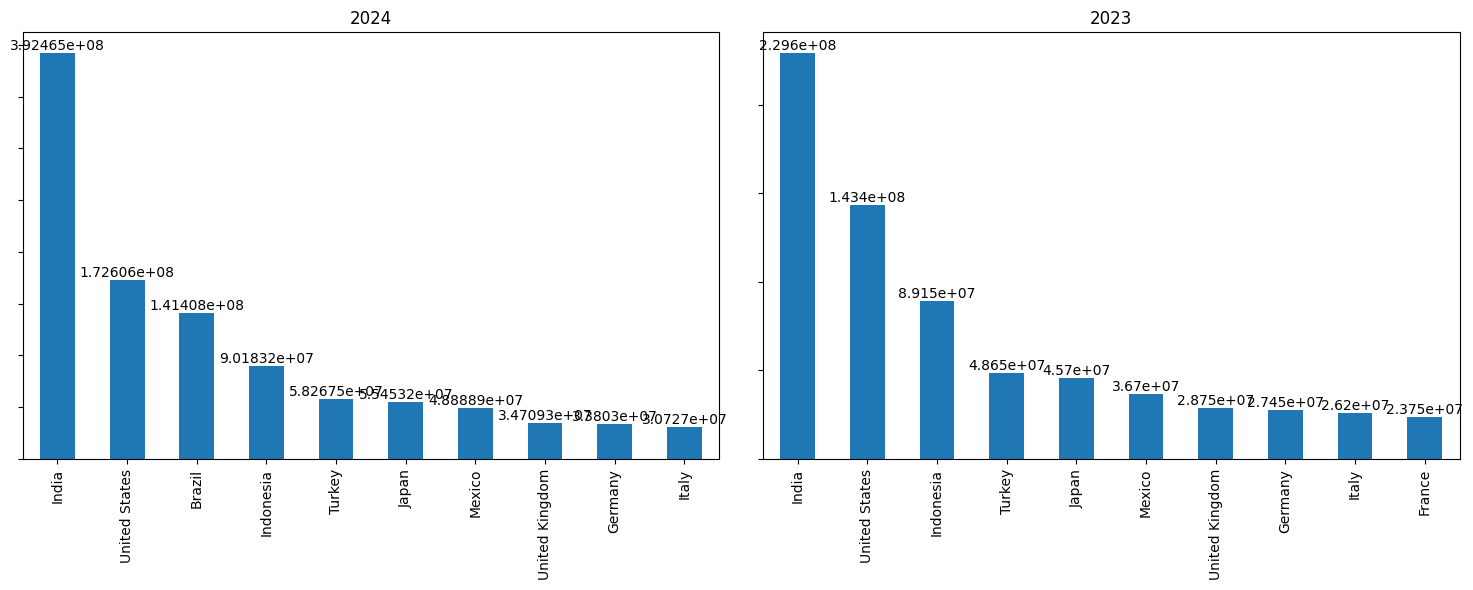

In [15]:
df["Users Increment, %"] = df["InstagramUsers_2024"]/df["InstagramUsers2023"]
df["Users Increment, %"] = df["Users Increment, %"].apply(lambda x: (x-1.0)*100)

fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

index = 0

df = df.sort_values("InstagramUsers_2024", ascending=False)
df["InstagramUsers_2024"][:10].plot(kind="bar", ax=axes[index])
bar_labels(axes[index])
axes[index].set_xticklabels(df.iloc[:10, 0], rotation=90)
axes[index].set_title("2024")

index += 1

df = df.sort_values("InstagramUsers2023", ascending=False)
df["InstagramUsers2023"][:10].plot(kind="bar", ax=axes[index])
bar_labels(axes[index])
axes[index].set_xticklabels(df.iloc[:10, 0], rotation=90)
axes[index].set_title("2023")

plt.tight_layout()
plt.show()

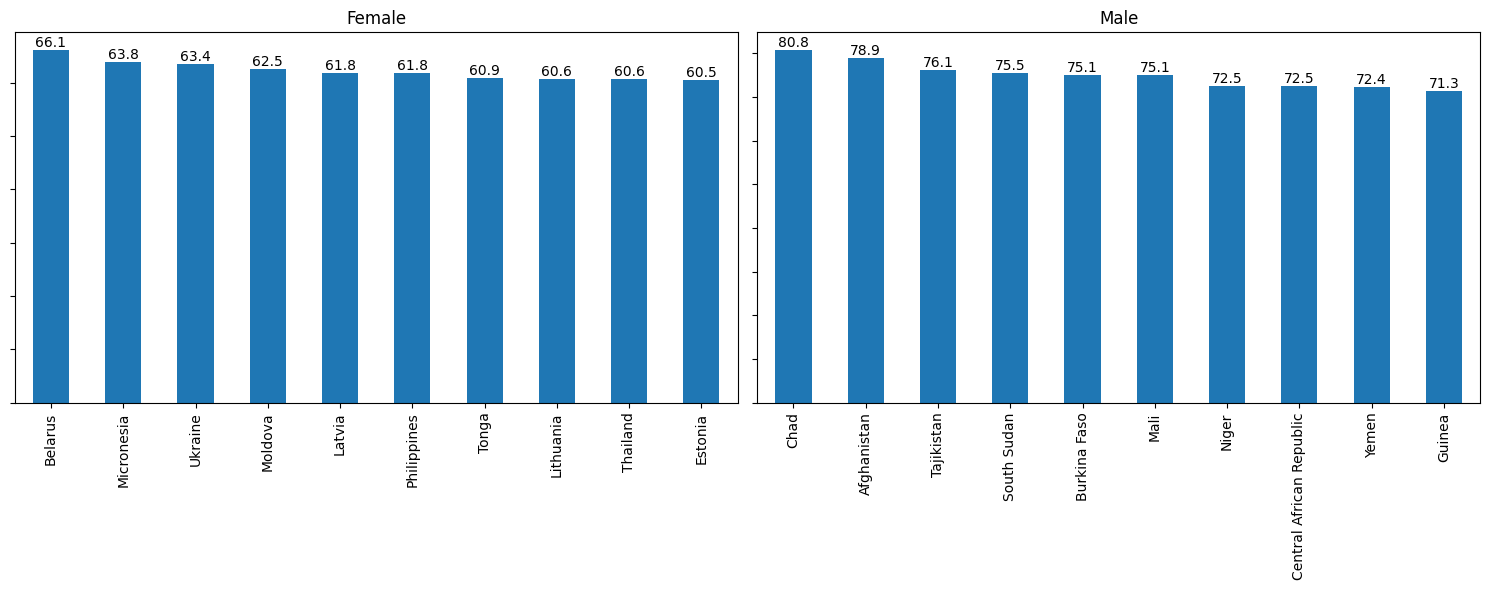

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

index = 0

df = df.sort_values("InstagramUsers_PctFemale_2024", ascending=False)
df["InstagramUsers_PctFemale_2024"][:10].plot(kind="bar", ax=axes[index])
bar_labels(axes[index])
axes[index].set_xticklabels(df.iloc[:10, 0], rotation=90)
axes[index].set_title("Female")

index += 1

df = df.sort_values("InstagramUsers_PctMale_2024", ascending=False)
df["InstagramUsers_PctMale_2024"][:10].plot(kind="bar", ax=axes[index])
bar_labels(axes[index])
axes[index].set_xticklabels(df.iloc[:10, 0], rotation=90)
axes[index].set_title("Male")

plt.tight_layout()
plt.show()

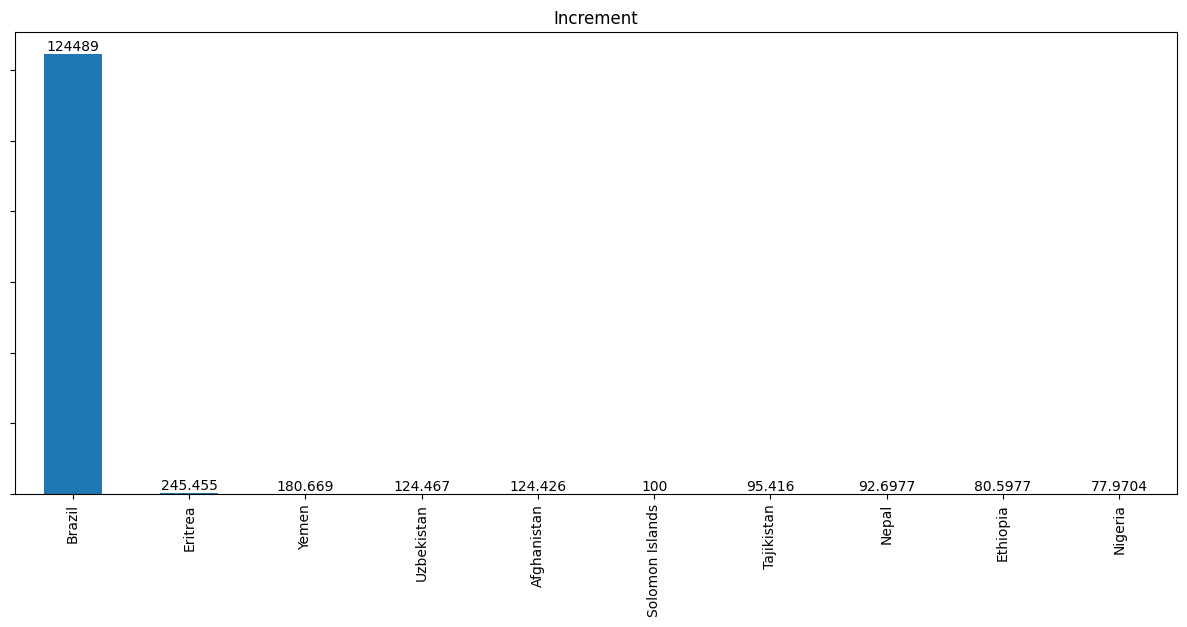

In [17]:
fig, axes = plt.subplots(figsize=(15, 6))

df = df.sort_values("Users Increment, %", ascending=False)
df["Users Increment, %"][:10].plot(kind="bar", ax=axes)
bar_labels(axes)
axes.set_xticklabels(df.iloc[:10, 0], rotation=90)
axes.set_title("Increment")

plt.show()

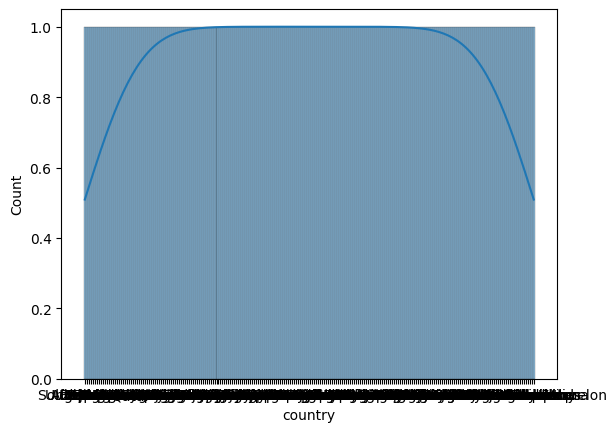

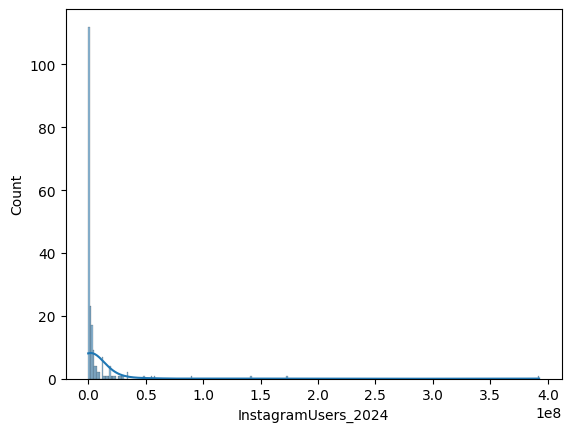

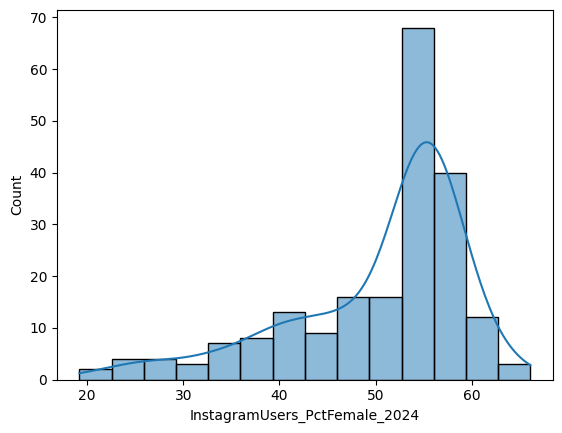

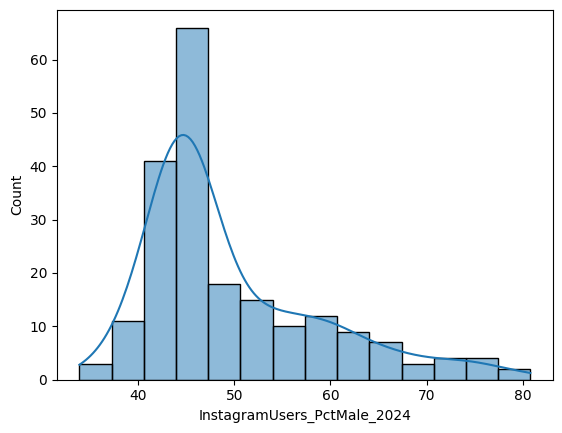

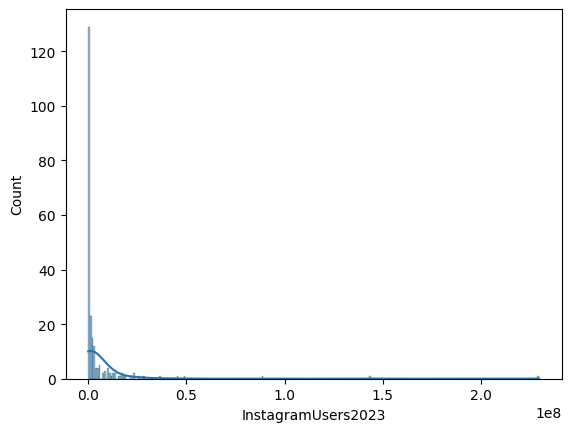

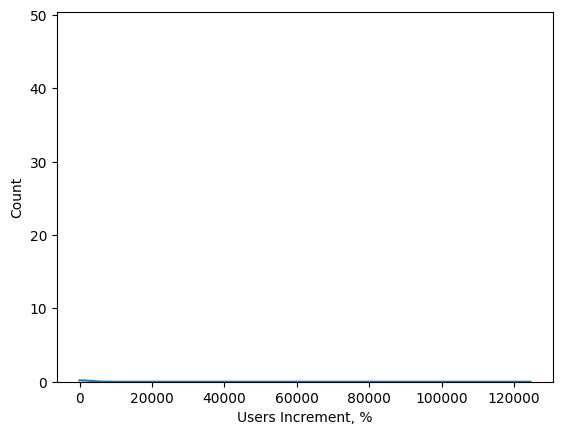

In [18]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

In [19]:
df.columns.tolist()


['country',
 'InstagramUsers_2024',
 'InstagramUsers_PctFemale_2024',
 'InstagramUsers_PctMale_2024',
 'InstagramUsers2023',
 'Users Increment, %']

In [20]:
import plotly.express as px
import pandas as pd

columns = ['country',
 'InstagramUsers_2024',
 'InstagramUsers_PctFemale_2024',
 'InstagramUsers_PctMale_2024',
 'InstagramUsers2023']

for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='black',  
                plot_bgcolor='black',   
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'},
                font=dict(color='white')  
            )
            
            fig.show()

        elif df[column].dtype in ['int64', 'float64']:
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='black',  
                plot_bgcolor='black',   
                title_font=dict(size=18, family="Arial"),
                font=dict(color='white') 
            )
            fig.show()
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

In [21]:
import plotly.express as px
import pandas as pd

columns =['country',
 'InstagramUsers_2024',
 'InstagramUsers_PctFemale_2024',
 'InstagramUsers_PctMale_2024',
 'InstagramUsers2023']
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue

        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']

            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )
            
            fig.show()

        elif df[column].dtype in ['int64', 'float64']:
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )
            fig.show()
    
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

In [22]:
df

,country,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023,"Users Increment, %"
5,Brazil,141408300.0,58.3,41.7,113500,124488.810573
124,Eritrea,9500.0,37.9,62.1,2750,245.454545
32,Yemen,1737900.0,27.6,72.4,619200,180.668605
38,Uzbekistan,9427600.0,38.1,61.9,4200000,124.466667
31,Afghanistan,1240400.0,21.1,78.9,552700,124.425547
...,...,...,...,...,...,...
223,Falkland Islands,NaN,NaN,NaN,1100,NaN
218,Wallis and Futuna,NaN,NaN,NaN,1050,NaN
220,Tuvalu,NaN,NaN,NaN,700,NaN
225,Niue,NaN,NaN,NaN,450,NaN


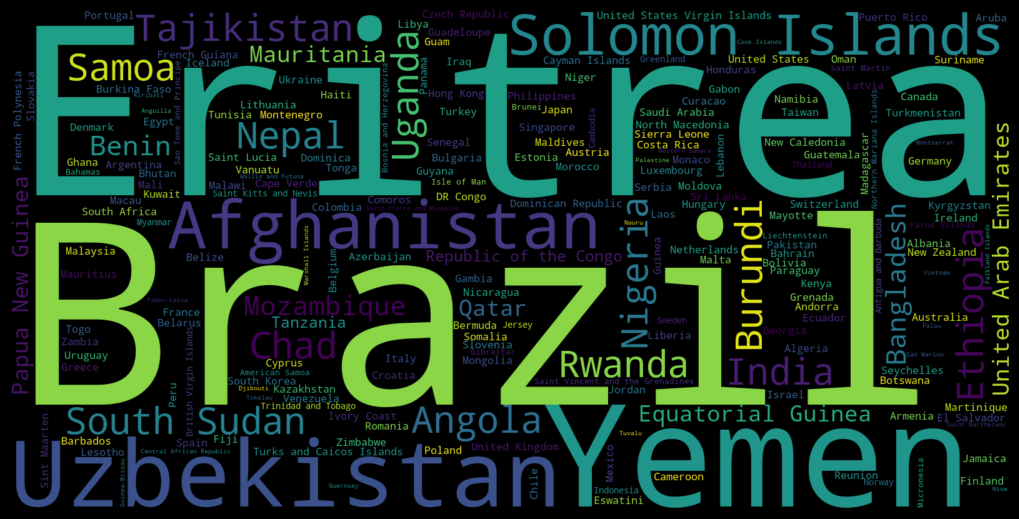

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

stop_words_list = set(STOPWORDS)

counts = Counter(df["country"].dropna().apply(lambda x: str(x)))

wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()